# Linear Transformation exercise

- This notebook apply a Linear Transformation **(via 2x2 matrix)** to a 2 variable cross/plot
        - It allow us to compare the scatter plot before and after the transformation

**Fava Luca**, fava_luca@libero.it

**This workflow is broken up to the primary steps of:**

    1 import and display the primary data

    2 normalize the values of the 2 input variables

    3 define the 2x2 matrix for the Linear transformation

    4 create the 2 TRANSformed variables and plot them

*This allows us to be able to watch the method in action, as opposed to just getting a result. I think this is more instructive.*

*Import libraries*

In [118]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting

*Set the working directory*

In [119]:
os.chdir("C:/Users/fava_/OneDrive/LUCA_Documents/IT/PYTHON/PyExercises")    # set the working directory

**1)** *Import the data from .csv file and chech it*

In [120]:
# open, read the .csv file and create a dataframe

df = pd.read_csv('AI_vs_PHIE_test_for_Linear_transformation.csv')    # load our data table
df.head()

,AI,PHIE_CPI_up
0,224224.5781,0.119424
1,224224.5781,0.119424
2,224224.5781,0.119424
3,224224.5781,0.119424
4,224224.5781,0.119424


*Simplify the name of Porosity column*

In [121]:
df = df.rename(columns={'PHIE_CPI_up': 'Porosity'})                     
df.head()

,AI,Porosity
0,224224.5781,0.119424
1,224224.5781,0.119424
2,224224.5781,0.119424
3,224224.5781,0.119424
4,224224.5781,0.119424


**2)** *Normalize the Values*

In [122]:
pormin = df['Porosity'].min(); pormax = df['Porosity'].max()
AImin = df['AI'].min(); AImax = df['AI'].max()

df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)
df['Norm_Porosity'] = (df['Porosity']-pormin)/(pormax - pormin)

*Let's check the result*

In [123]:
df.head(10)

,AI,Porosity,Norm_AI,Norm_Porosity
0,224224.5781,0.119424,0.562332,0.380525
1,224224.5781,0.119424,0.562332,0.380525
2,224224.5781,0.119424,0.562332,0.380525
3,224224.5781,0.119424,0.562332,0.380525
4,224224.5781,0.119424,0.562332,0.380525
5,224224.5781,0.119424,0.562332,0.380525
6,224224.5781,0.119424,0.562332,0.380525
7,224224.5781,0.119424,0.562332,0.380525
8,224224.5781,0.119424,0.562332,0.380525
9,224224.5781,0.119424,0.562332,0.380525


In [124]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AI,105036.0,213112.519775,20315.719270,140015.2969,197345.609400,211482.328100,228658.625000,289765.343800
Porosity,105036.0,0.096740,0.065429,0.0001,0.045524,0.098869,0.135015,0.313676
Norm_AI,105036.0,0.488128,0.135664,0.0000,0.382840,0.477242,0.591942,1.000000
Norm_Porosity,105036.0,0.308188,0.208656,0.0000,0.144857,0.314976,0.430248,1.000000


### PLOT

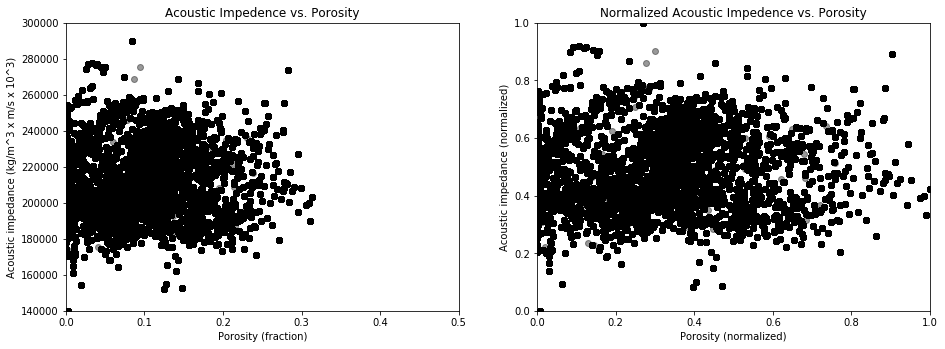

In [125]:
plt.subplot(121)
plt.scatter(df['Porosity'], df['AI'], c="black", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Acoustic Impedence vs. Porosity'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(0, 0.5)
plt.ylim(140000, 300000)

plt.subplot(122)
plt.scatter(df['Norm_Porosity'], df['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Normalized Acoustic Impedence vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

**3)** *Define the 2x2 matrix*

In this case we decided to have a "shear" transformation, obtained by using a 2x2 matrix as follows:

**{(1,0),(1,1)}**

### See the Theory in this video:

**3Blue1Brown** Youtube channel
**Series** *Essence of linear Algebra*
CHAPTER 3 - https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3

In [126]:
matrix=np.matrix([[1,0],[1,1]])
matrix

matrix([[1, 0],
        [1, 1]])

In [127]:
print(df.shape)

(105036, 4)


#### LINEAR TRANSFORMATION

Create 2 new columns with o values to accomodate the results of the transformation

In [128]:
zeros = np.zeros(105036)                  # make a ARRAY of zeros, we need NUMPY for that
df["Trans_PHIE"] = pd.Series(zeros)
df["Trans_AI"] = pd.Series(zeros)
df.head(10)

,AI,Porosity,Norm_AI,Norm_Porosity,Trans_PHIE,Trans_AI
0,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
1,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
2,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
3,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
4,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
5,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
6,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
7,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
8,224224.5781,0.119424,0.562332,0.380525,0.0,0.0
9,224224.5781,0.119424,0.562332,0.380525,0.0,0.0


In [129]:
for i in range (0, 105036):
    df.loc[i,'Trans_PHIE']=matrix[0,0]*df.loc[i,'Norm_Porosity']+matrix[0,1]*df.loc[i,'Norm_AI']
    df.loc[i,'Trans_AI']=matrix[1,0]*df.loc[i,'Norm_Porosity']+matrix[1,1]*df.loc[i,'Norm_AI']

In [130]:
df.head()

,AI,Porosity,Norm_AI,Norm_Porosity,Trans_PHIE,Trans_AI
0,224224.5781,0.119424,0.562332,0.380525,0.380525,0.942858
1,224224.5781,0.119424,0.562332,0.380525,0.380525,0.942858
2,224224.5781,0.119424,0.562332,0.380525,0.380525,0.942858
3,224224.5781,0.119424,0.562332,0.380525,0.380525,0.942858
4,224224.5781,0.119424,0.562332,0.380525,0.380525,0.942858


In [131]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AI,105036.0,213112.519775,20315.719270,140015.2969,197345.609400,211482.328100,228658.625000,289765.343800
Porosity,105036.0,0.096740,0.065429,0.0001,0.045524,0.098869,0.135015,0.313676
Norm_AI,105036.0,0.488128,0.135664,0.0000,0.382840,0.477242,0.591942,1.000000
Norm_Porosity,105036.0,0.308188,0.208656,0.0000,0.144857,0.314976,0.430248,1.000000
Trans_PHIE,105036.0,0.308188,0.208656,0.0000,0.144857,0.314976,0.430248,1.000000
Trans_AI,105036.0,0.796317,0.255226,0.0060,0.596973,0.798612,0.975109,1.796024


### PLOT

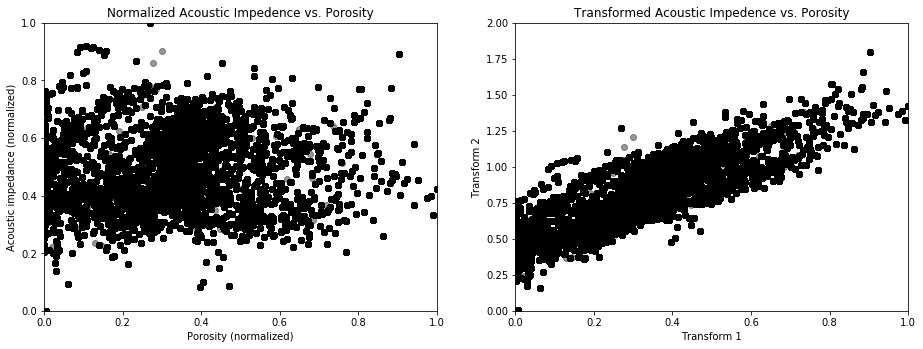

In [132]:
plt.subplot(121)
plt.scatter(df['Norm_Porosity'], df['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Normalized Acoustic Impedence vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)

plt.subplot(122)
plt.scatter(df['Trans_PHIE'], df['Trans_AI'], c="black", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Transformed Acoustic Impedence vs. Porosity'); plt.xlabel('Transform 1'); plt.ylabel('Transform 2')
plt.xlim(0.0,1.0)
plt.ylim(0.0,2.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)